K-Means is similar to KNN. In KNN(supervisesd learning) the class(output) are availabe only if we give inputs values, then it defines which class is assigned to the input values. But in K-Means Clusting(unsupervised learning) the classes(clusters) values is choosen. Accoring to this clssification, the input values are assigned to nearst cluster.

In [ ]:
import pandas as pd

In [ ]:
# Raw link for data set: https://github.com/praveensunkara19/Data/blob/main/Mall_Customers.csv

df = pd.read_csv("https://raw.githubusercontent.com/praveensunkara19/Data/main/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


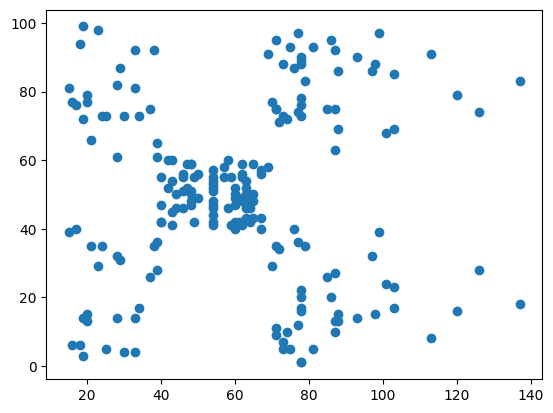

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [ ]:
x = df.iloc[ : , [3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#By looking at this we can say that  k=5(expecting) to conform use elbow method

# 1) we have to consider K value in b/w the 0 to 14 ,
#    becoz here the entires was 200 only

import numpy as np
np.sqrt(200)


14.142135623730951

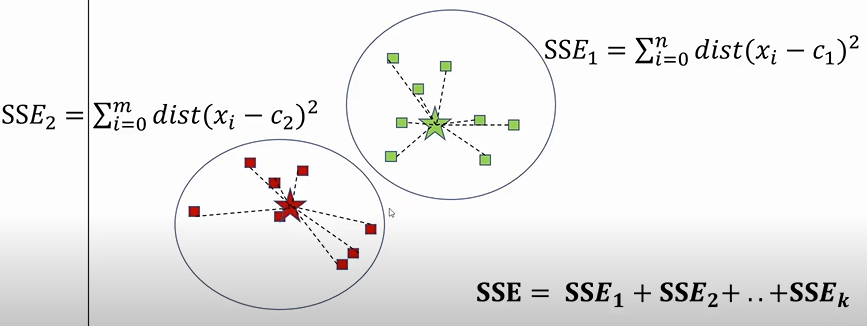

In [ ]:
# By using the Elbow method we can calculate the K value
# step-1: find the SSE(sum of sqared errors)
# step-2: plot the SSE against k value range

from sklearn.cluster import KMeans
k = range(2,14)
sse =[] #error/inertia
for i in k:
 model_demo = KMeans(n_clusters = i, random_state =0)
 model_demo.fit(x)
 sse.append(model_demo.inertia_)


In [ ]:
sse

[181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128,
 17702.59593229628,
 15810.838613705502,
 14763.330402558204]

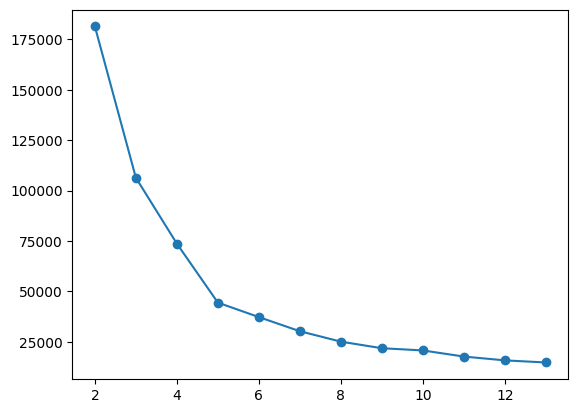

In [ ]:
# now plot error for every k value

plt.scatter(k,sse)
plt.plot(k,sse)  #consider the point where the elblow is more prominant
                # the point of k is the best number of clusters to take

In [ ]:
#Applying K-Means Algorithm

k = 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, random_state =0) #we can take any number of
model.fit(x)                                    #clusters b/w 2,14,but k =5 is best fit
y = model.predict(x)
y

#it genetates the output according that future similarity
#tells cluster evey point belongs to(0,1,2,3,4)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
# to know the number of points(out 0f 200) near the clusters

np.unique(y,return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([35, 81, 39, 22, 23]))

In [ ]:
35+81+39+22+23

200

In [ ]:
x[y==0,0] # 0th cluster  0 - X axis

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [ ]:
x[y==0,1] #1st cluster 1- x axis

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

In [ ]:
x[y==1,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76])

In [ ]:
x[y==1,1]

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40])

In [ ]:
#cluster center = centroid of cluster

#        88.2       , 17.11428571 -centorid of cluster -1
      #  55.2962963 , 49.51851852 -centorid of cluster -2
      #  86.53846154, 82.12820513 -centorid of cluster -3
      #  25.72727273, 79.36363636 -centorid of cluster -4
      #  26.30434783, 20.91304348 -centorid of cluster -5
model.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

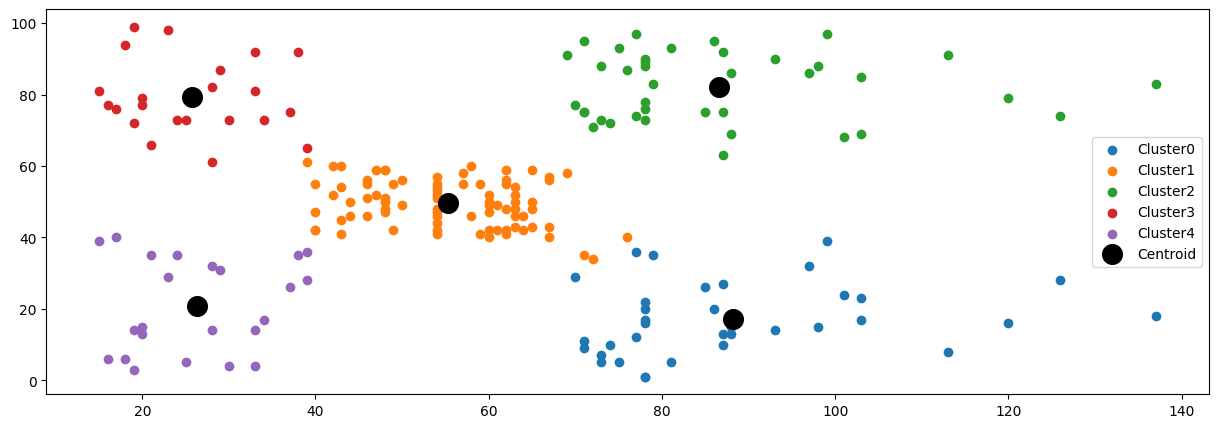

In [ ]:
plt.figure(figsize=(15,5))
for i in range(k):
  plt.scatter(x[y==i,0],x[y==i,1],label = f'Cluster{i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,c='black',label='Centroid')
plt.legend()
plt.show()

K-Means Clustring Applications:

1) Real estate companies.

2) Streaming companies like netfilx and prime. Anaylse streaing content and time spent on particular shows etc...

3) Recommendation Systems works on Clustering by analysing your interests.